In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold


In [ ]:
data = pd.read_csv("creditcard.csv")

###Analyzing the dataset

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#No missing values

In [ ]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#Calculating percentage of fraud compared to legitimate transactions
fraud = data.groupby(['Class']).size()[1]
percentage = fraud/(data.shape[0]) * 100
print("The percentage of fraudulent transactions in the entire dataset is: %5.5f" %  percentage)

The percentage of fraudulent transactions in the entire dataset is: 0.17275


###Viewing relationship between features like Time, Amount and Class

In [ ]:
vis_data = data[['Time','Amount','Class']]

In [ ]:
vis_data.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


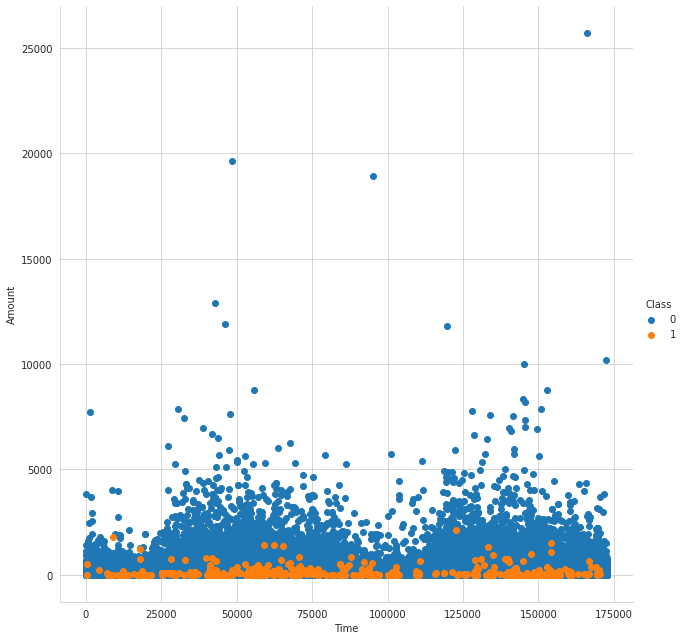

In [ ]:
sns.set_style("whitegrid")
plot1 = sns.FacetGrid(data, hue="Class", size = 9)
plot1.map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

From the above plot we can see that most of the transactions that are legitimate or fraud come under the Amount of below 5000. So, others can be considered as outliers and we are removing those values.

### Visualization using PCA

In [ ]:
X_vis = data.drop(["Class"],axis = 1)
y_vis = data["Class"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(X_vis)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComp = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComp
             , columns = ['pc1', 'pc2'])

In [ ]:
finaldata = pd.concat([principalDf,data["Class"]],axis = 1)

Text(0, 0.5, 'component 1')

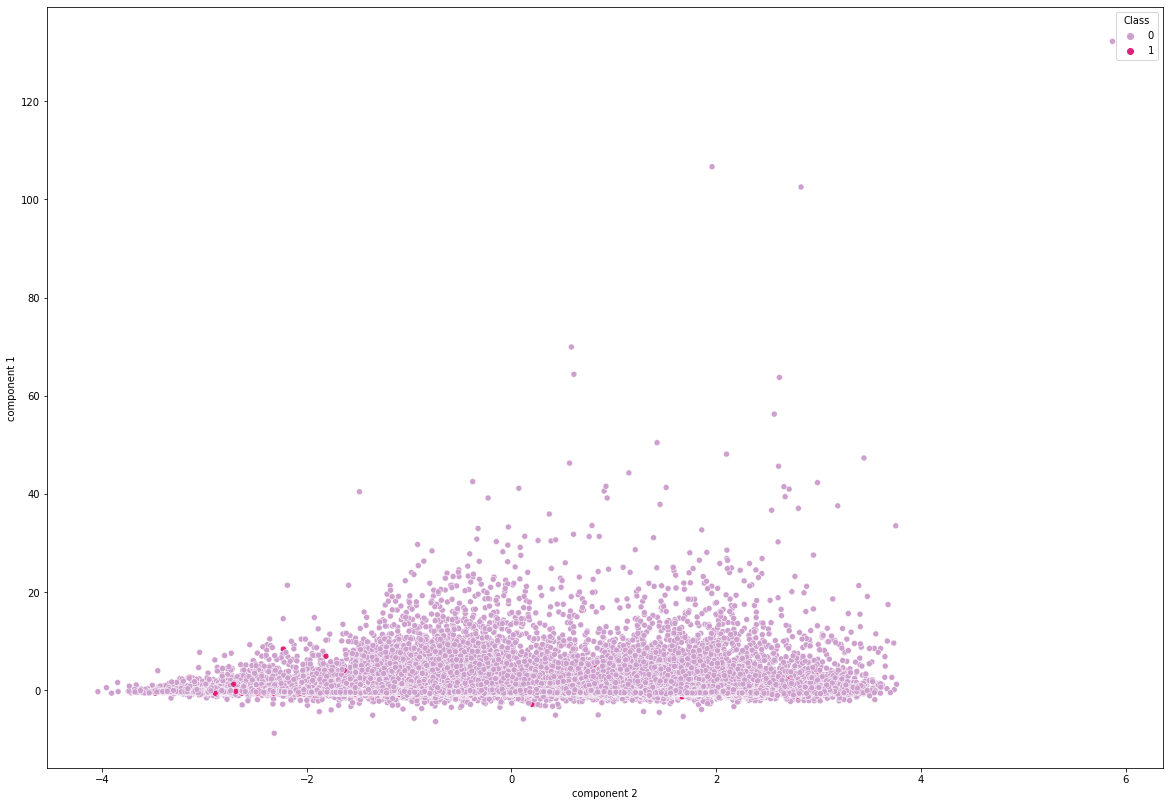

In [ ]:
plt.figure(figsize=(20, 14))
sns.scatterplot(data = finaldata,y=finaldata["pc1"],x= finaldata ["pc2"],
            hue=finaldata["Class"],palette = "PuRd",alpha = 1)
plt.xlabel('component 2')
plt.ylabel('component 1')

### Outlier Detection and Removal 

In [ ]:
data_modified = pd.DataFrame(data[data["Amount"] <=5000])

In [ ]:
data_modified["Amount"].describe()

count    284752.000000
mean         86.877386
std         220.369427
min           0.000000
25%           5.580000
50%          22.000000
75%          77.050000
max        4959.850000
Name: Amount, dtype: float64

In [ ]:
data_modified.shape

(284752, 31)

In [ ]:
print("No.of Outliers removed :" ,data.shape[0]-data_modified.shape[0])

No.of Outliers removed : 55


In [ ]:
#We have only removed 55 records so this is fine.

Checking the relationship between Time and Class

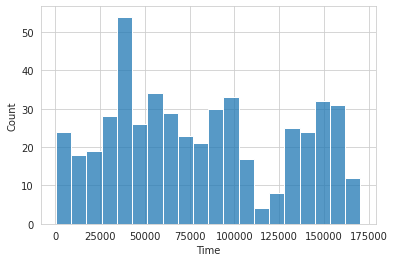

In [ ]:
#Checking the Time feature relationship
sns.histplot(data["Time"][data["Class"]==1], bins = 20 )


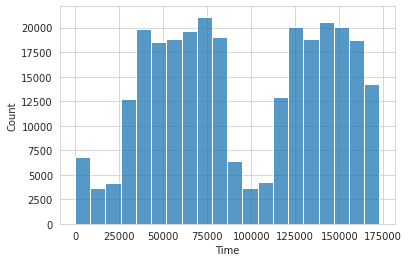

In [ ]:
sns.histplot(data["Time"][data["Class"]==0], bins = 20 )


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


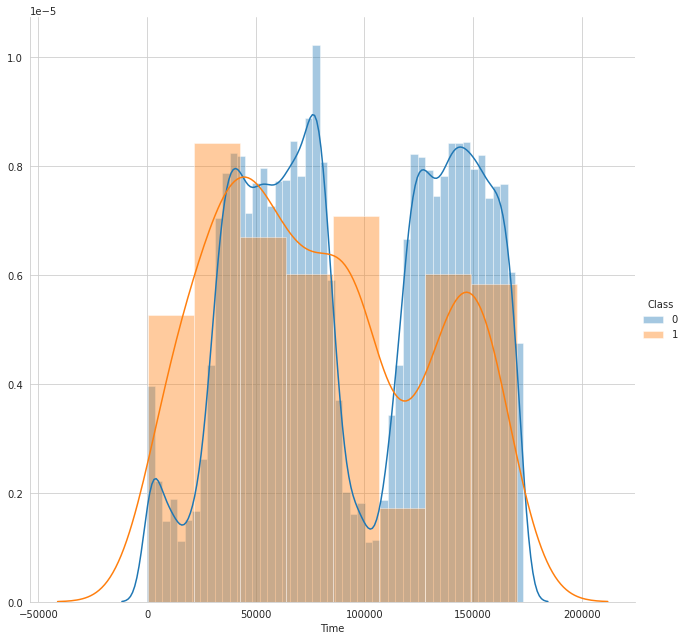

In [ ]:
sns.set_style("whitegrid")
plot2 = sns.FacetGrid(data, hue="Class", size = 9)
plot2.map(sns.distplot, "Time").add_legend()
plt.show()

The feature time doesn't appear to have any impact on the data. Its varying and doesn't show any real relationship between the transactions and timeline. So we are dropping it.

In [ ]:
data_modified.drop(["Time"],axis = 1,inplace = True)

In [ ]:
data_modified.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Standardizing the Amount feature 

In [ ]:
scaler = StandardScaler()
data_modified["Amount"] = scaler.fit_transform(data_modified["Amount"].values.reshape(-1,1))

In [ ]:
data_modified.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.284716,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.382029,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.324064,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.166188,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.076632,0


We know that the no. of fraudulent transactions are very less compared to the no. of legitimate transactions. So, this happens to be an unbalanced dataset. 



### Splitting dataset without Random Sampling

In [ ]:
X = data_modified.drop(["Class"],axis = 1)
y = data_modified["Class"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227801, 29)
(227801,)
(56951, 29)
(56951,)


### Logistic Regression - Base Model without Sampling



In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_logistic = logistic.predict(X_test)

In [ ]:
accuracy_logistic = accuracy_score(y_test,y_pred_logistic)
precision_lg = precision_score(y_test,y_pred_logistic)
recall_lg = recall_score(y_test,y_pred_logistic)
f1_lg = f1_score(y_test,y_pred_logistic)
print("Accuracy Score is :",accuracy_logistic)
print("Precision Score :",precision_lg)
print("Recall Score :",recall_lg)
print("F1 Score :",f1_lg)

Accuracy Score is : 0.9994029955575846
Precision Score : 0.9090909090909091
Recall Score : 0.6329113924050633
F1 Score : 0.746268656716418


Confusion Matrix 

[[56867     5]
 [   29    50]] 



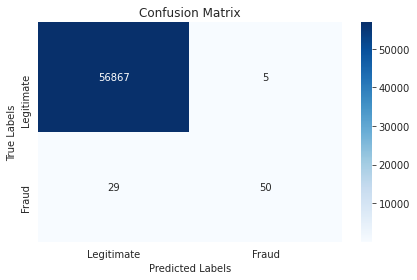

In [ ]:
print("Confusion Matrix \n")
cm_lg = confusion_matrix(y_test,y_pred_logistic)
print(cm_lg,"\n")
df_cm_lg = pd.DataFrame(cm_lg, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_lg,cmap='Blues',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report \n")
print(classification_report(y_test,y_pred_logistic))

Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.91      0.63      0.75        79

    accuracy                           1.00     56951
   macro avg       0.95      0.82      0.87     56951
weighted avg       1.00      1.00      1.00     56951



ROC Curve 

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

In [ ]:
lr_pred_probabilities_fraud = logistic.predict_proba(X_test)[:,1] #predicting the probability of occurance of 1
fpr,tpr,threshold = roc_curve(y_test,lr_pred_probabilities_fraud)
lg_auc = roc_auc_score(y_test, lr_pred_probabilities_fraud)

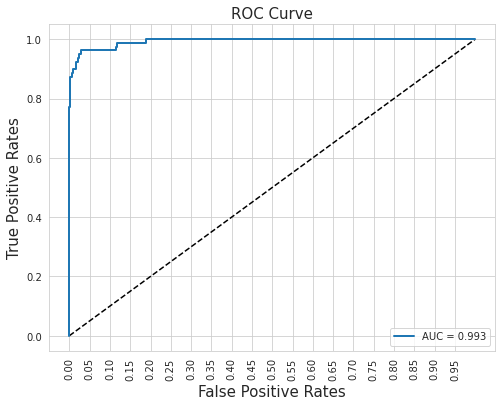

In [ ]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lg_auc)

### Random over sampling 

Using SMOTE - Making new synthetic data to match the ones with less data ---> Learn more

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X_smote,y_smote = SMOTE().fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X_smote.shape)
print(y_smote.shape)

(568520, 29)
(568520,)


In [ ]:
from collections import Counter
count = Counter(y_smote)
print(count)

Counter({0: 284260, 1: 284260})


Both 0 and 1 have equal no. of datapoints so they are equally distributed.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size = 0.2 , random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(454816, 29)
(454816,)
(113704, 29)
(113704,)


### Logistic Regression - Over Sampling

In [ ]:
logistic2 = LogisticRegression()
logistic2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_logistic2 = logistic2.predict(X_test)

In [ ]:
accuracy_logistic2 = accuracy_score(y_test,y_pred_logistic2)
precision_lg2 = precision_score(y_test,y_pred_logistic2)
recall_lg2 = recall_score(y_test,y_pred_logistic2)
f1_lg2 = f1_score(y_test,y_pred_logistic2)
print("Accuracy Score is :",accuracy_logistic2)
print("Precision Score :",precision_lg2)
print("Recall Score :",recall_lg2)
print("F1 Score :",f1_lg2)

Accuracy Score is : 0.9473281502849504
Precision Score : 0.9740993292580963
Recall Score : 0.91941706709691
F1 Score : 0.9459686222855751


Confusion Matrix 

[[55288  1394]
 [ 4595 52427]] 



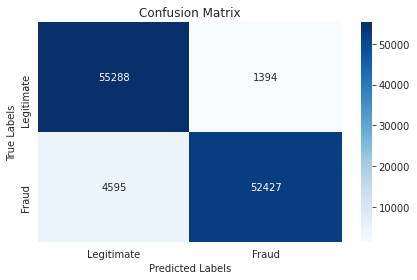

In [ ]:
print("Confusion Matrix \n")
cm_lg2 = confusion_matrix(y_test,y_pred_logistic2)
print(cm_lg2,"\n")
df_cm_lg2 = pd.DataFrame(cm_lg2, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_lg2,cmap='Blues',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()

In [ ]:
print("Classification Report \n")
print(classification_report(y_test,y_pred_logistic2))

Classification Report 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56682
           1       0.97      0.92      0.95     57022

    accuracy                           0.95    113704
   macro avg       0.95      0.95      0.95    113704
weighted avg       0.95      0.95      0.95    113704



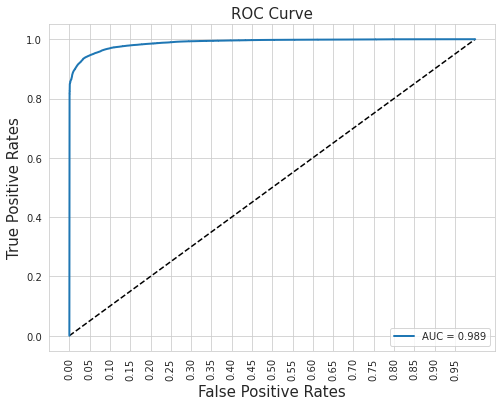

In [ ]:
lr_pred_probabilities_fraud2 = logistic2.predict_proba(X_test)[:,1] #predicting the probability of occurance of 1
fpr2,tpr2,threshold2 = roc_curve(y_test,lr_pred_probabilities_fraud2)
lg_auc2 = roc_auc_score(y_test, lr_pred_probabilities_fraud2)
plot_roc_curve(fpr=fpr2, tpr=tpr2, label="AUC = %.3f" % lg_auc2)

### Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

random_undersampler = RandomUnderSampler(sampling_strategy = 0.5)
X_undersample,y_undersample = random_undersampler.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
count2 = Counter(y_undersample)
print(count2)

Counter({0: 984, 1: 492})


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_undersample,y_undersample,test_size = 0.2 , random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1180, 29)
(1180,)
(296, 29)
(296,)


### Logistic Regression - Under Sampling

In [ ]:
logistic3 = LogisticRegression()
logistic3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_logistic3 = logistic3.predict(X_test)

In [ ]:
accuracy_logistic3 = accuracy_score(y_test,y_pred_logistic3)
precision_lg3 = precision_score(y_test,y_pred_logistic3)
recall_lg3 = recall_score(y_test,y_pred_logistic3)
f1_lg3 = f1_score(y_test,y_pred_logistic3)
print("Accuracy Score is :",accuracy_logistic3)
print("Precision Score :",precision_lg3)
print("Recall Score :",recall_lg3)
print("F1 Score :",f1_lg3)

Accuracy Score is : 0.972972972972973
Precision Score : 0.9789473684210527
Recall Score : 0.9393939393939394
F1 Score : 0.9587628865979383


Confusion Matrix 

[[195   2]
 [  6  93]] 



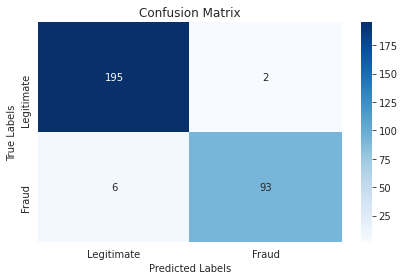

In [ ]:
print("Confusion Matrix \n")
cm_lg3 = confusion_matrix(y_test,y_pred_logistic3)
print(cm_lg3,"\n")
df_cm_lg3 = pd.DataFrame(cm_lg3, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_lg3,cmap='Blues',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()

In [ ]:
print("Classification Report \n")
print(classification_report(y_test,y_pred_logistic3))

Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       197
           1       0.98      0.94      0.96        99

    accuracy                           0.97       296
   macro avg       0.97      0.96      0.97       296
weighted avg       0.97      0.97      0.97       296



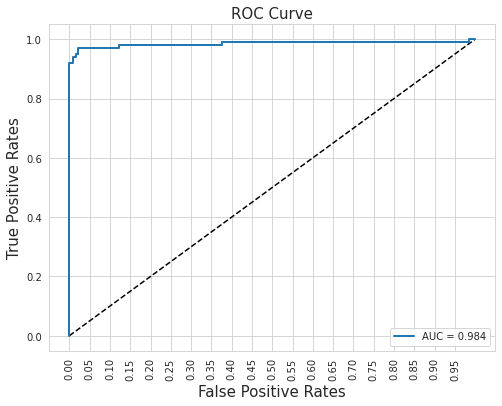

In [ ]:
lr_pred_probabilities_fraud3 = logistic3.predict_proba(X_test)[:,1] #predicting the probability of occurance of 1
fpr3,tpr3,threshold3 = roc_curve(y_test,lr_pred_probabilities_fraud3)
lg_auc3 = roc_auc_score(y_test, lr_pred_probabilities_fraud3)
plot_roc_curve(fpr=fpr3, tpr=tpr3, label="AUC = %.3f" % lg_auc3)

### Logistic Regression - Hyperparameter tuning GridSearchCV

In [ ]:
Kfold_cv = StratifiedKFold(n_splits = 10)
lg_reg_hp = LogisticRegression()

params = {
    'penalty' : ['l2'],
     'max_iter' : [100,200,300],
     'C' : [0.001,0.01,0.1,1,10],
     'solver' : ['liblinear']
}

grid_lg = GridSearchCV(lg_reg_hp, param_grid = params, cv = Kfold_cv,scoring = 'accuracy',n_jobs=5,verbose =1)

In [ ]:
grid_lg.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  50 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:    1.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=5,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='ac

In [ ]:
best_estimator_lg = grid_lg.best_estimator_
best_estimator_lg

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
best_score_lg = grid_lg.best_score_
best_score_lg

0.9559322033898306

In [ ]:
y_pred_lg_hp = grid_lg.best_estimator_.predict(X_test)

In [ ]:
accuracy_lghp = accuracy_score(y_test,y_pred_lg_hp)
precision_lghp = precision_score(y_test,y_pred_lg_hp)
recall_lghp = recall_score(y_test,y_pred_lg_hp)
f1_lghp = f1_score(y_test,y_pred_lg_hp)
print("Accuracy Score is :",accuracy_lghp)
print("Precision Score :",precision_lghp)
print("Recall Score :",recall_lghp)
print("F1 Score :",f1_lghp)

Accuracy Score is : 0.956081081081081
Precision Score : 0.9574468085106383
Recall Score : 0.9090909090909091
F1 Score : 0.9326424870466321


Confusion Matrix for Logistic Regression with Hyperparameter Tuning 

[[193   4]
 [  9  90]] 



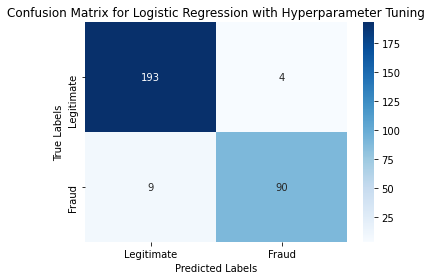

In [ ]:
print("Confusion Matrix for Logistic Regression with Hyperparameter Tuning \n")
cm_lghp = confusion_matrix(y_test,y_pred_lg_hp)
print(cm_lghp,"\n")
df_cm_lghp = pd.DataFrame(cm_lghp, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_lghp,cmap='Blues',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression with Hyperparameter Tuning")
plt.tight_layout()

In [ ]:
print("Classification Report for Logistic Regression with Hyperparameter Tuning \n")
print(classification_report(y_test,y_pred_lg_hp))

Classification Report for Logistic Regression with Hyperparameter Tuning 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       197
           1       0.96      0.91      0.93        99

    accuracy                           0.96       296
   macro avg       0.96      0.94      0.95       296
weighted avg       0.96      0.96      0.96       296



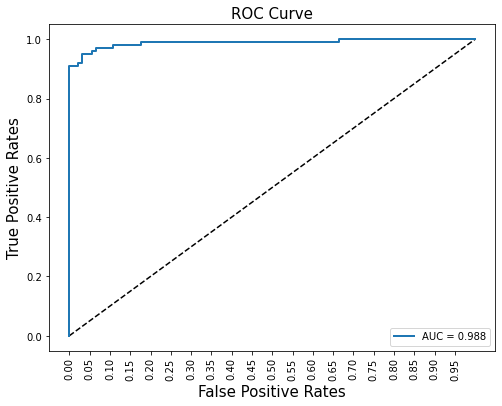

In [ ]:
lghp_pred_probabilities = grid_lg.best_estimator_.predict_proba(X_test)[:,1] 
fpr_lghp,tpr_lghp,threshold_lghp = roc_curve(y_test,lghp_pred_probabilities)
lghp_auc = roc_auc_score(y_test, lghp_pred_probabilities)
plot_roc_curve(fpr=fpr_lghp, tpr=tpr_lghp, label="AUC = %.3f" %lghp_auc)

### Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
precision_rfc = precision_score(y_test,y_pred_rfc)
recall_rfc = recall_score(y_test,y_pred_rfc)
f1_rfc = f1_score(y_test,y_pred_rfc)
print("Accuracy Score is :",accuracy_rfc)
print("Precision Score :",precision_rfc)
print("Recall Score :",recall_rfc)
print("F1 Score :",f1_rfc)

Accuracy Score is : 0.9594594594594594
Precision Score : 0.9484536082474226
Recall Score : 0.9292929292929293
F1 Score : 0.9387755102040816


Confusion Matrix for RFC 

[[192   5]
 [  7  92]] 



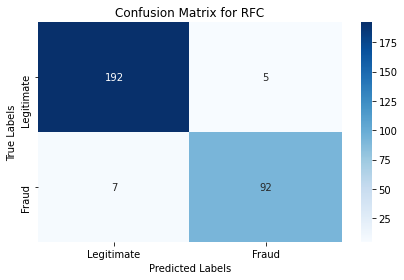

In [ ]:
print("Confusion Matrix for RFC \n")
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
print(cm_rfc,"\n")
df_cm_rfc = pd.DataFrame(cm_rfc, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_rfc,cmap='Blues',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for RFC")
plt.tight_layout()

In [ ]:
print("Classification Report for RFC \n")
print(classification_report(y_test,y_pred_rfc))

Classification Report for RFC 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       197
           1       0.95      0.93      0.94        99

    accuracy                           0.96       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.96      0.96       296



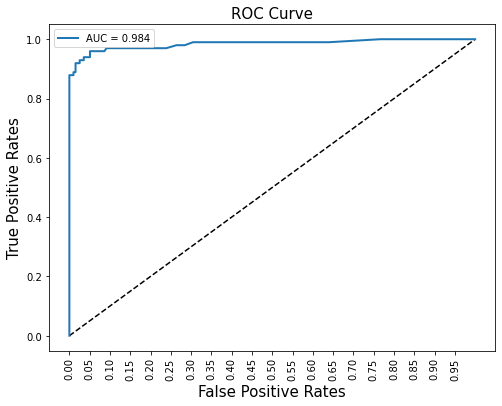

In [ ]:
rfc_pred_probabilities = rfc.predict_proba(X_test)[:,1] 
fpr_rfc,tpr_rfc,threshold_rfc = roc_curve(y_test,rfc_pred_probabilities)
rfc_auc = roc_auc_score(y_test, rfc_pred_probabilities)
plot_roc_curve(fpr=fpr_rfc, tpr=tpr_rfc, label="AUC = %.3f" %rfc_auc)

### Random Forest Classifier - With Hyperparameter Tuning 

In [ ]:
Kfold_cv = StratifiedKFold(n_splits = 10)
rfc2 = RandomForestClassifier()
params = {
    'max_depth' : [None],
    'min_samples_split' : [2,6,10,20],
    'min_samples_leaf' : [1,4,8,16],
    'n_estimators' : [100,200,300,400],
    'criterion' :['gini','entropy'],
    'random_state' : [42,72,100,200]
}

grid_rfc = GridSearchCV(rfc2, param_grid = params, cv = Kfold_cv, scoring = 'accuracy', n_jobs = 3, verbose = 1)

In [ ]:
grid_rfc.fit(X_train,y_train)

Fitting 10 folds for each of 512 candidates, totalling 5120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   10.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  3.3min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  6.0min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:  9.1min
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed: 12.8min
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed: 17.0min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed: 24.1min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed: 31.8min
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed: 40.1min
[Parallel(n_jobs=3)]: Done 5120 out of 5120 | elapsed: 41.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=3,
         

In [ ]:
rfc_best_estimator = grid_rfc.best_estimator_ 
print(rfc_best_estimator)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=200,
                       verbose=0, warm_start=False)


In [ ]:
rfc_best_score = grid_rfc.best_score_
rfc_best_score

0.9559322033898306

In [ ]:
y_pred_rfc2 = grid_rfc.best_estimator_.predict(X_test)

In [ ]:
accuracy_rfc2 = accuracy_score(y_test,y_pred_rfc2)
precision_rfc2 = precision_score(y_test,y_pred_rfc2)
recall_rfc2 = recall_score(y_test,y_pred_rfc2)
f1_rfc2 = f1_score(y_test,y_pred_rfc2)
print("Accuracy Score is :",accuracy_rfc2)
print("Precision Score :",precision_rfc2)
print("Recall Score :",recall_rfc2)
print("F1 Score :",f1_rfc2)

Accuracy Score is : 0.9493243243243243
Precision Score : 0.9468085106382979
Recall Score : 0.898989898989899
F1 Score : 0.9222797927461138


Confusion Matrix for RFC with hyperparameter tuning

[[192   5]
 [ 10  89]] 



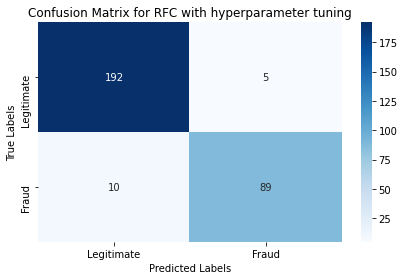

In [ ]:
print("Confusion Matrix for RFC with hyperparameter tuning\n")
cm_rfc2 = confusion_matrix(y_test,y_pred_rfc2)
print(cm_rfc2,"\n")
df_cm_rfc2 = pd.DataFrame(cm_rfc2, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_rfc2,cmap='Blues',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for RFC with hyperparameter tuning")
plt.tight_layout()

In [ ]:
print("Classification Report for RFC \n")
print(classification_report(y_test,y_pred_rfc2))

Classification Report for RFC 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       197
           1       0.95      0.90      0.92        99

    accuracy                           0.95       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.95      0.95       296



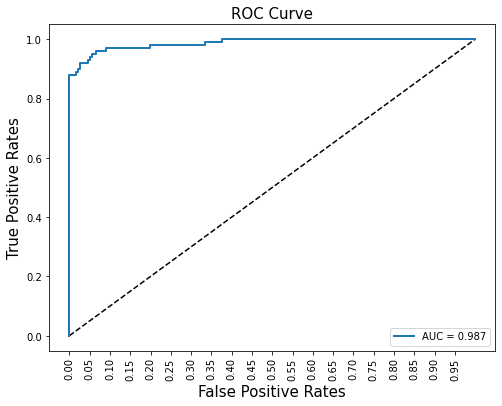

In [ ]:
rfc_pred_probabilities2 = grid_rfc.best_estimator_.predict_proba(X_test)[:,1] 
fpr_rfc2,tpr_rfc2,threshold_rfc2 = roc_curve(y_test,rfc_pred_probabilities2)
rfc_auc2 = roc_auc_score(y_test, rfc_pred_probabilities2)
plot_roc_curve(fpr=fpr_rfc2, tpr=tpr_rfc2, label="AUC = %.3f" %rfc_auc2)

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()
xgboost_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_predxg = xgboost_model.predict(X_test)


In [ ]:
accuracy_xgb = accuracy_score(y_test,y_predxg)
precision_xgb = precision_score(y_test,y_predxg)
recall_xgb = recall_score(y_test,y_predxg)
f1_xgb = f1_score(y_test,y_predxg)
print("Accuracy Score is :",accuracy_xgb)
print("Precision Score :",precision_xgb)
print("Recall Score :",recall_xgb)
print("F1 Score :",f1_xgb)

Accuracy Score is : 0.9662162162162162
Precision Score : 0.968421052631579
Recall Score : 0.9292929292929293
F1 Score : 0.9484536082474226


Confusion Matrix for XGBoost

[[194   3]
 [  7  92]] 



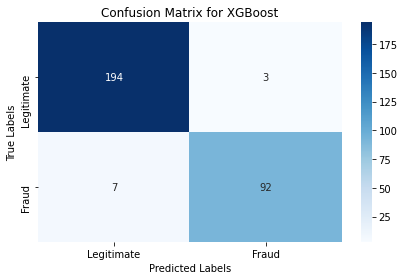

In [ ]:
print("Confusion Matrix for XGBoost\n")
cm_xgb = confusion_matrix(y_test,y_predxg)
print(cm_xgb,"\n")
df_cm_xgb = pd.DataFrame(cm_xgb, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_xgb,cmap='Blues',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XGBoost")
plt.tight_layout()

In [ ]:
print("Classification Report for XGBoost \n")
print(classification_report(y_test,y_predxg))

Classification Report for XGBoost 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       197
           1       0.97      0.93      0.95        99

    accuracy                           0.97       296
   macro avg       0.97      0.96      0.96       296
weighted avg       0.97      0.97      0.97       296



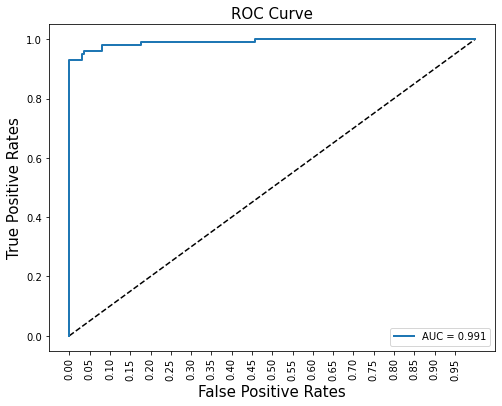

In [ ]:
xgb_pred_probabilities = xgboost_model.predict_proba(X_test)[:,1] #predicting the probability of occurance of 1
fpr_xgb,tpr_xgb,threshold_xgb = roc_curve(y_test,xgb_pred_probabilities)
xgb_auc = roc_auc_score(y_test, xgb_pred_probabilities)
plot_roc_curve(fpr=fpr_xgb, tpr=tpr_xgb, label="AUC = %.3f" %xgb_auc)

### XGBoost Classifier with hyperparameter tuning 

In [ ]:
Kfold_cv = StratifiedKFold(n_splits = 10,shuffle = True)
xgb2 = XGBClassifier()
params = {
    'max_depth' : [2,4,6,8],
    'learning_rate' : [0.1,0.01,0.001,0.0001],
    'colsample_bytree' : [0.7,0.8,0.9,1.0],
    'min_child_weight' : [1,3,5,7],
    'subsample' :[0.25,0.5,0.75,1.0],
    'gamma' : [0.5,1,1.5,2]
}

grid_xgb = GridSearchCV(xgb2, param_grid = params, cv = Kfold_cv, scoring = 'accuracy', n_jobs = 5, verbose = 1)

In [ ]:
grid_xgb.fit(X_train,y_train)

Fitting 10 folds for each of 4096 candidates, totalling 40960 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   10.6s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   25.9s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:   44.9s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed:  2.7min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed:  3.4min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed:  4.4min
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed:  5.5min
[Parallel(n_jobs=5)]: Done 6040 tasks      | elapsed:  6.5min
[Parallel(n_jobs=5)]: Done 7190 tasks      | elapsed:  7.8min
[Parallel(n_jobs=5)]: Done 8440 tasks      | elapsed:  9.2min
[Parallel(n_jobs=5)]: Done 9790 tasks      | elapsed: 10.7min
[Parallel(n_jobs=5)]: Done 11240 tasks      | elapsed: 12.3mi

In [ ]:
xgb_best_estimator = grid_xgb.best_estimator_ 
print(xgb_best_estimator)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)


In [ ]:
xgb_best_score = grid_xgb.best_score_
xgb_best_score

0.9601694915254239

In [ ]:
y_pred_xgb2 = grid_xgb.best_estimator_.predict(X_test)

In [ ]:
accuracy_xgb2 = accuracy_score(y_test,y_pred_xgb2)
precision_xgb2 = precision_score(y_test,y_pred_xgb2)
recall_xgb2 = recall_score(y_test,y_pred_xgb2)
f1_xgb2 = f1_score(y_test,y_pred_xgb2)
print("Accuracy Score is :",accuracy_xgb2)
print("Precision Score :",precision_xgb2)
print("Recall Score :",recall_xgb2)
print("F1 Score :",f1_xgb2)

Accuracy Score is : 0.972972972972973
Precision Score : 0.9789473684210527
Recall Score : 0.9393939393939394
F1 Score : 0.9587628865979383


Confusion Matrix for XGBoost with hyperparameter tuning

[[195   2]
 [  6  93]] 



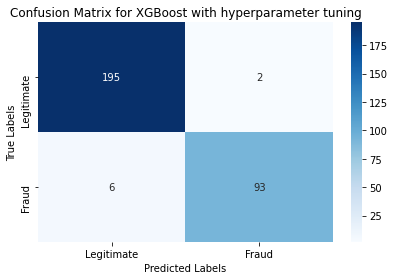

In [ ]:
print("Confusion Matrix for XGBoost with hyperparameter tuning\n")
cm_xgb2 = confusion_matrix(y_test,y_pred_xgb2)
print(cm_xgb2,"\n")
df_cm_xgb2 = pd.DataFrame(cm_xgb2, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_xgb2,cmap='Blues',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XGBoost with hyperparameter tuning")
plt.tight_layout()

In [ ]:
print("Classification Report for XGBoost with hyperparameter tuning \n")
print(classification_report(y_test,y_pred_xgb2))

Classification Report for XGBoost with hyperparameter tuning 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       197
           1       0.98      0.94      0.96        99

    accuracy                           0.97       296
   macro avg       0.97      0.96      0.97       296
weighted avg       0.97      0.97      0.97       296



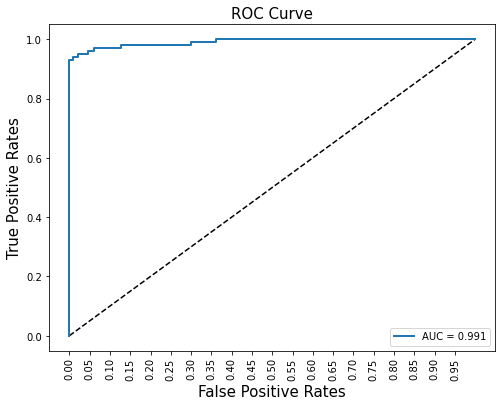

In [ ]:
xgb_pred_probabilities2 = grid_xgb.best_estimator_.predict_proba(X_test)[:,1] 
fpr_xgb2,tpr_xgb2,threshold_xgb2 = roc_curve(y_test,xgb_pred_probabilities2)
xgb_auc2 = roc_auc_score(y_test, xgb_pred_probabilities2)
plot_roc_curve(fpr=fpr_xgb2, tpr=tpr_xgb2, label="AUC = %.3f" %xgb_auc2)

### Support Vector Machine - Linear SVM Model with under sampling

In [ ]:
from sklearn.svm import LinearSVC


In [ ]:
svc1 = LinearSVC()
svc1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_pred_svc1= svc1.predict(X_test)

In [ ]:
accuracy_svc1 = accuracy_score(y_test,y_pred_svc1)
precision_svc1 = precision_score(y_test,y_pred_svc1)
recall_svc1 = recall_score(y_test,y_pred_svc1)
f1_svc1 = f1_score(y_test,y_pred_svc1)
print("Accuracy Score is :",accuracy_svc1)
print("Precision Score :",precision_svc1)
print("Recall Score :",recall_svc1)
print("F1 Score :",f1_svc1)

Accuracy Score is : 0.9594594594594594
Precision Score : 0.9484536082474226
Recall Score : 0.9292929292929293
F1 Score : 0.9387755102040816


Confusion Matrix for SVM 

[[192   5]
 [  7  92]] 



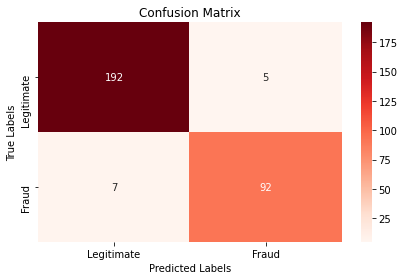

In [ ]:
print("Confusion Matrix for SVM \n")
cm_svc1 = confusion_matrix(y_test,y_pred_svc1)
print(cm_svc1,"\n")
df_cm_svc1 = pd.DataFrame(cm_svc1, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_svc1,cmap='Reds',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()

In [ ]:
print("Classification Report for SVM\n")
print(classification_report(y_test,y_pred_svc1))

Classification Report for SVM

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       197
           1       0.95      0.93      0.94        99

    accuracy                           0.96       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.96      0.96       296



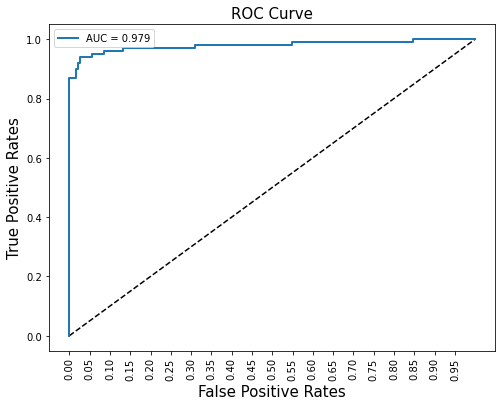

In [ ]:
svc_pred_probabilities_fraud1 = svc1._predict_proba_lr(X_test)[:,1] #predicting the probability of occurance of 1
fpr3,tpr3,threshold3 = roc_curve(y_test,svc_pred_probabilities_fraud1)
svc_auc1 = roc_auc_score(y_test, svc_pred_probabilities_fraud1)
plot_roc_curve(fpr=fpr3, tpr=tpr3, label="AUC = %.3f" % svc_auc1)

### SVM - Hyperparameter Training GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
svm_grid = LinearSVC();
# defining parameter range

param_grid = {'C':[0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(svm_grid, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.945, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.962, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.941, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.949, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.953, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.945, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

[CV] ................................. C=1, score=0.945, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.962, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.936, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.949, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.953, total=   0.0s
[CV] C=10 ............................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=10, score=0.936, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.962, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.941, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.953, total=   0.0s
[CV] C=10 ............................................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] ................................ C=10, score=0.945, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.932, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.911, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.945, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.949, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.941, total=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=3)

In [ ]:
svc_best = grid.best_estimator_

# Best score
grid.best_score_

0.9508474576271186

In [ ]:
best_estimator_svc= grid.best_estimator_
best_estimator_svc

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_pred_svc_hp = grid.best_estimator_.predict(X_test)

In [ ]:
accuracy_svchp = accuracy_score(y_test,y_pred_svc_hp)
precision_svchp = precision_score(y_test,y_pred_svc_hp)
recall_svchp = recall_score(y_test,y_pred_svc_hp)
f1_svchp = f1_score(y_test,y_pred_svc_hp)
print("Accuracy Score is :",accuracy_svchp)
print("Precision Score :",precision_svchp)
print("Recall Score :",recall_svchp)
print("F1 Score :",f1_svchp)

Accuracy Score is : 0.9594594594594594
Precision Score : 0.9484536082474226
Recall Score : 0.9292929292929293
F1 Score : 0.9387755102040816


Confusion Matrix for Linear SVC 

[[192   5]
 [  7  92]] 



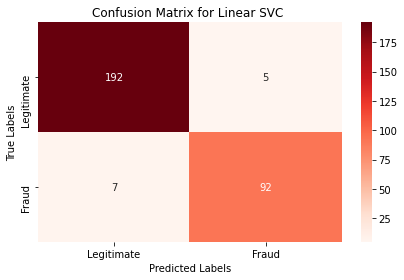

In [ ]:
print("Confusion Matrix for Linear SVC \n")
cm_svchp = confusion_matrix(y_test,y_pred_svc_hp)
print(cm_svchp,"\n")
df_cm_svchp = pd.DataFrame(cm_svchp, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_svchp,cmap='Reds',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Linear SVC ")
plt.tight_layout()

In [ ]:
print("Classification Report for Linear SVC  \n")
print(classification_report(y_test,y_pred_svc_hp))

Classification Report for Linear SVC  

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       197
           1       0.95      0.93      0.94        99

    accuracy                           0.96       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.96      0.96       296



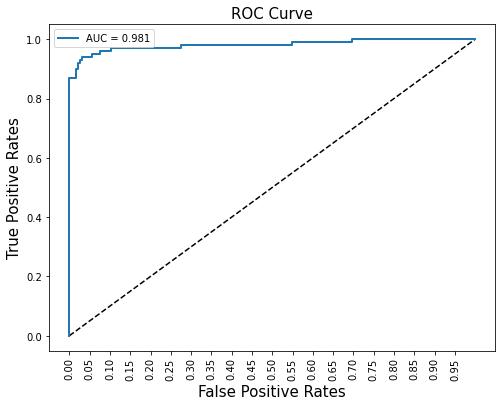

In [ ]:
svchp_pred_probabilities = grid.best_estimator_._predict_proba_lr(X_test)[:,1] 
fpr_svchp,tpr_svchp,threshold_svchp = roc_curve(y_test,svchp_pred_probabilities)
svchp_auc = roc_auc_score(y_test, svchp_pred_probabilities)
plot_roc_curve(fpr=fpr_svchp, tpr=tpr_svchp, label="AUC = %.3f" %svchp_auc)

###  K-Nearest Neighbors - Under Sampling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_smp = KNeighborsClassifier(n_neighbors=12)
knn_smp.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn_smp = knn_smp.predict(X_test)

In [ ]:
accuracy_knn_smp = accuracy_score(y_test,y_pred_knn_smp)
precision_knn_smp = precision_score(y_test,y_pred_knn_smp)
recall_knn_smp = recall_score(y_test,y_pred_knn_smp)
f1_knn_smp = f1_score(y_test,y_pred_knn_smp)

In [ ]:
print("Accuracy Score is :",accuracy_knn_smp)
print("Precision Score :",precision_knn_smp)
print("Recall Score :",recall_knn_smp)
print("F1 Score :",f1_knn_smp)

Accuracy Score is : 0.9628378378378378
Precision Score : 1.0
Recall Score : 0.8888888888888888
F1 Score : 0.9411764705882353


In [ ]:
print("Confusion Matrix for K-Nearest Neighbors under Sampling\n")
cm_knn_smp = confusion_matrix(y_test,y_pred_knn_smp)
print(cm_knn_smp,"\n")

Confusion Matrix for K-Nearest Neighbors under Sampling

[[197   0]
 [ 11  88]] 



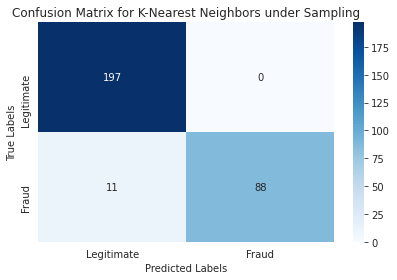

In [ ]:
df_cm_knn_smp = pd.DataFrame(cm_knn_smp, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_knn_smp,cmap='Blues',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for K-Nearest Neighbors under Sampling")
plt.tight_layout()

In [ ]:
print("Classification Report for K-Nearest Neighbors under Sampling \n")
print(classification_report(y_test,y_pred_knn_smp))

Classification Report for K-Nearest Neighbors under Sampling 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       197
           1       1.00      0.89      0.94        99

    accuracy                           0.96       296
   macro avg       0.97      0.94      0.96       296
weighted avg       0.96      0.96      0.96       296



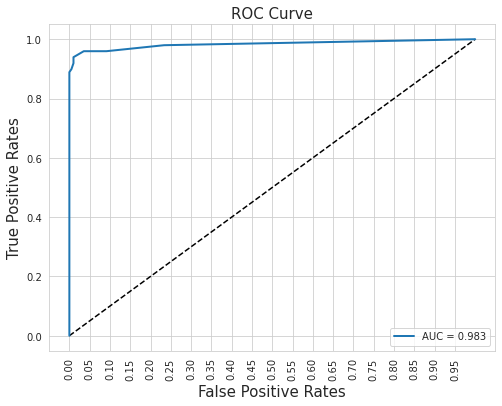

In [ ]:
knn_smp_pred_probabilities = knn_smp.predict_proba(X_test)[:,1]
fpr_knn_smp,tpr_knn_smp,threshold_knn_smp = roc_curve(y_test,knn_smp_pred_probabilities)
knn_smp_auc = roc_auc_score(y_test, knn_smp_pred_probabilities)
plot_roc_curve(fpr=fpr_knn_smp, tpr=tpr_knn_smp, label="AUC = %.3f" %knn_smp_auc)

## K-Nearest Neighbors with Hyperparameter Tuning

In [ ]:
knn = KNeighborsClassifier()
params_knn_ht = dict(n_neighbors = list(range(1,31)), weights = ['uniform', 'distance'], metric = ['euclidean', 'manhattan', 'minkowski'])
knn_ht_grid = GridSearchCV(knn, params_knn_ht, cv=3, scoring='accuracy', n_jobs=-1)

In [ ]:
knn_ht_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
knn_ht_best_estimator = knn_ht_grid.best_estimator_ 
knn_ht_best_estimator

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

In [ ]:
knn_ht_best_score = knn_ht_grid.best_score_
knn_ht_best_score

0.9550940098078472

In [ ]:
y_pred_knn_ht = knn_ht_grid.best_estimator_.predict(X_test)

In [ ]:
accuracy_knn_ht = accuracy_score(y_test,y_pred_knn_ht)
precision_knn_ht = precision_score(y_test,y_pred_knn_ht)
recall_knn_ht = recall_score(y_test,y_pred_knn_ht)
f1_knn_ht = f1_score(y_test,y_pred_knn_ht)
print("Accuracy Score is :",accuracy_knn_ht)
print("Precision Score :",precision_knn_ht)
print("Recall Score :",recall_knn_ht)
print("F1 Score :",f1_knn_ht)

Accuracy Score is : 0.9695945945945946
Precision Score : 1.0
Recall Score : 0.9090909090909091
F1 Score : 0.9523809523809523


Confusion Matrix for K-Nearest Neighbors with Hyperparameter Tuning 

[[197   0]
 [  9  90]] 



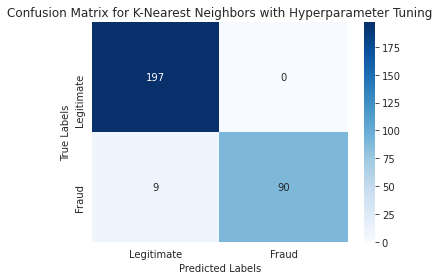

In [ ]:
print("Confusion Matrix for K-Nearest Neighbors with Hyperparameter Tuning \n")
cm_knn_ht = confusion_matrix(y_test,y_pred_knn_ht)
print(cm_knn_ht,"\n")
df_cm_knn_ht = pd.DataFrame(cm_knn_ht, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_knn_ht,cmap='Blues',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for K-Nearest Neighbors with Hyperparameter Tuning")
plt.tight_layout()

In [ ]:
print("Classification Report for K-Nearest Neighbors with Hyperparameter Tuning \n")
print(classification_report(y_test,y_pred_knn_ht))

Classification Report for K-Nearest Neighbors with Hyperparameter Tuning 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       197
           1       1.00      0.91      0.95        99

    accuracy                           0.97       296
   macro avg       0.98      0.95      0.97       296
weighted avg       0.97      0.97      0.97       296



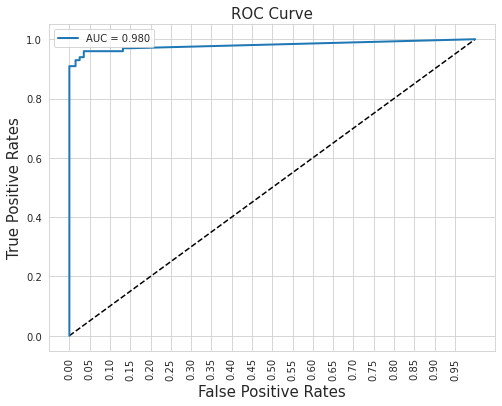

In [ ]:
pred_probabilities_knn_ht = knn_ht_best_estimator.predict_proba(X_test)[:,1] 
fpr_knn_ht,tpr_knn_ht,threshold_knn_ht = roc_curve(y_test,pred_probabilities_knn_ht)
auc_knn_ht = roc_auc_score(y_test, pred_probabilities_knn_ht)
plot_roc_curve(fpr=fpr_knn_ht, tpr=tpr_knn_ht, label="AUC = %.3f" %auc_knn_ht)